In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
import xgboost as xgb

In [ ]:
# Load the dataset

dummy = pd.read_csv('dummy.csv')
dummy = dummy.drop(columns = ['Unnamed: 0'])

dummy.head()

,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,...,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
0,0,2,0,0,4,1,0,0,1,2,...,0,0,0,0,0,0,1,1,7,4
1,3,2,2,0,4,5,0,0,1,0,...,0,0,3,0,0,2,2,1,3,4
2,0,2,1,1,3,0,0,0,1,2,...,0,0,3,0,3,2,0,1,1,4
3,0,1,5,0,4,3,0,1,0,2,...,0,0,0,0,0,2,0,1,3,3
4,0,1,2,1,2,5,0,0,2,2,...,0,0,0,0,2,2,0,1,9,4


In [ ]:
# Find the correlation between columns and how you feel about the future (Use Matthew's Correlation Coefficient)
from sklearn.metrics import matthews_corrcoef # For How do you feel about the future?

dummy_copy = dummy.copy() # Copy used for coefficient analysis only
# dummy_copy.drop(columns = ['How many betel nuts a day on average?', 'How many cigarettes a day on average?'])

# Analysis for the Matthew's Correlation Coefficient
coefficient = {"Questions": dummy_copy.columns}

# Get the correlation coefficients
for item in dummy_copy.columns:
  curr = dummy_copy[item] # Get the column
  curr = curr.to_numpy()
  coef_list = []

  for q in dummy_copy.columns:
    Y = dummy_copy[q].to_numpy()

    coef = matthews_corrcoef(curr, Y)
    coef_list.append(coef)

  coefficient[item] = coef_list

coefficient = pd.DataFrame(coefficient)

pd.set_option('display.max_rows', None)
coefficient.head(100)

,Questions,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,...,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
0,Bhasan Char,1.000000,0.113618,0.010490,-0.020695,-0.029834,-0.015812,-0.042969,-0.021230,0.009032,...,0.015516,0.061618,-0.041980,-0.009724,0.148203,-0.087578,0.062958,-0.073427,-0.025606,0.031365
1,Illegal Activity,0.113618,1.000000,0.039194,-0.063248,0.012829,-0.051846,0.001595,-0.075277,-0.094778,...,0.154526,0.070994,0.037809,-0.002585,0.071107,-0.050363,-0.019399,-0.065997,0.012216,0.077229
2,People Leaving,0.010490,0.039194,1.000000,-0.017772,0.049450,-0.034784,0.059652,-0.090134,-0.078468,...,0.016401,-0.001078,0.016126,-0.004024,-0.021342,-0.054278,0.002494,0.130553,0.026175,-0.105627
3,Myanmar Rights Views,-0.020695,-0.063248,-0.017772,1.000000,0.000734,-0.072003,-0.012592,0.342238,-0.274760,...,-0.054578,-0.033493,0.050120,0.023294,-0.100012,-0.031495,-0.013847,0.196455,-0.005572,-0.038637
4,Mental Health,-0.029834,0.012829,0.049450,0.000734,1.000000,-0.011726,0.048133,-0.003941,-0.056425,...,0.004459,-0.032340,0.105710,-0.000750,-0.029626,0.013740,0.010206,0.028856,0.051811,-0.032848
5,Trust,-0.015812,-0.051846,-0.034784,-0.072003,-0.011726,1.000000,0.036391,-0.013131,0.147105,...,-0.022597,-0.008862,0.005083,0.008227,0.017681,0.004750,0.085746,-0.028149,-0.005398,-0.037287
6,Access to Help,-0.042969,0.001595,0.059652,-0.012592,0.048133,0.036391,1.000000,-0.057552,0.112426,...,-0.041174,-0.024831,0.131648,0.002435,-0.013457,0.030033,-0.028075,0.182250,0.050387,-0.158643
7,Personal Support,-0.021230,-0.075277,-0.090134,0.342238,-0.003941,-0.013131,-0.057552,1.000000,-0.157979,...,-0.034033,-0.004308,-0.051776,0.030947,-0.042640,0.011649,-0.032275,-0.003564,-0.005101,-0.118685
8,Violence,0.009032,-0.094778,-0.078468,-0.274760,-0.056425,0.147105,0.112426,-0.157979,1.000000,...,-0.011002,-0.005264,-0.067748,-0.030034,0.056706,0.071869,-0.019577,-0.058160,-0.025778,-0.045162
9,Camp Condition,-0.056695,0.068228,0.078879,0.047740,0.120513,-0.021981,0.320481,-0.084891,0.056437,...,0.064909,0.050987,0.160997,-0.028463,0.015130,0.133266,-0.134689,0.296748,0.055782,-0.131278


In [ ]:
# Correlation matrix is too large

def view_correlation(coef, index: int) -> int:
  """Take in an index and then return the sorted numbers."""

  df = coef.iloc[:, [0, index]]
  column = coef.columns[index]
  df = df.sort_values(column, ascending = False)

  return df

def obtain_features(coef, cut_off = 0.15) -> list:
  """Obtain the features after viewing correlation in list format.
  """

  features = []

  for item in coef.to_dict('records'):
    correlation = item[coef.columns[-1]]
    curr_index = coef.columns[0]
    question = item[curr_index]

    if np.abs(correlation) >= cut_off:
      features.append(question)

  return features

def create_features(curr: list, features: list) -> list:
  """Take in a current and features list and then append items from features to current, and then return them."""

  for item in features:
    if not (item in curr):
      curr.append(item)

  return curr

# View the correlation: How do you feel about the future?

curr = view_correlation(coefficient, 35)
future_features = obtain_features(curr)

# View the correlation: To what extent do you feel at home in the camp in Bangladesh now?

curr = view_correlation(coefficient, 33)
home_features = obtain_features(curr)

# View the correlation: Do you often feel stressed or overwhelmed by your situation?

#curr = view_correlation(coefficient, 31)
#stress_features = obtain_features(curr)

# Final list of features

features = create_features(future_features, home_features)
#features = create_features(features, stress_features)

# Final Dummy List
dummy['confidence_index'] = dummy['How do you feel about the future?'] + dummy['To what extent do you feel at home in the camp in Bangladesh now?']
dummy = dummy.drop(columns= ['How do you feel about the future?', 'To what extent do you feel at home in the camp in Bangladesh now?'])


In [ ]:
# List the features
dummy = dummy.filter(items = ['confidence_index', *features])
dummy_feat = dummy.columns
print(f'Number of features: {len(dummy_feat)}')

for item in dummy_feat:
  print(item)

Number of features: 8
confidence_index
How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?
How satisfied are you with the income your family makes in the camp?
Access to Help
Where do you think you will be in six months from now?
Camp Condition
Sex
Myanmar Rights Views


<Axes: >

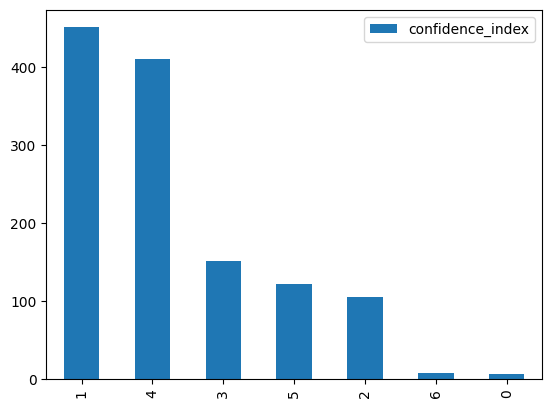

In [ ]:
# Visualize the distribution of the confidence index

counts = pd.DataFrame(dummy['confidence_index'].value_counts())
counts.plot.bar()

In [ ]:
from matplotlib.font_manager import X11FontDirectories
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Y = dummy['confidence_index']
X = dummy.drop(['confidence_index'], axis = 1)


# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 0)

In [ ]:
# Fit the Gaussian Naive Bayes

NaiveBayes = MultinomialNB(alpha = 1)
model = NaiveBayes.fit(X_train, Y_train)
y_train_pred = NaiveBayes.predict(X_train)
y_val_pred = NaiveBayes.predict(X_val)
y_test_pred = NaiveBayes.predict(X_test)

  # Calculate Accuracy
train_acc = accuracy_score(Y_train, y_train_pred)
val_acc = accuracy_score(Y_val, y_val_pred)
test_acc = accuracy_score(Y_test, y_test_pred)

print(f"The Training Accuracy: {train_acc}")
print(f"The Validation Accuracy: {val_acc}")
print(f"The Test Accuracy: {test_acc}")

The Training Accuracy: 0.5906374501992032
The Validation Accuracy: 0.5873015873015873
The Test Accuracy: 0.6428571428571429


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

report = pd.DataFrame(classification_report(Y_test, y_test_pred, output_dict = True))
report.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.629630,0.0,0.0,0.651163,1.000000,0.0,0.642857,0.380132,0.559404
recall,0.980769,0.0,0.0,0.736842,0.153846,0.0,0.642857,0.311910,0.642857
f1-score,0.766917,0.0,0.0,0.691358,0.266667,0.0,0.642857,0.287490,0.552524
support,52.000000,8.0,14.0,38.000000,13.000000,1.0,0.642857,126.000000,126.000000
